<a href="https://colab.research.google.com/github/YaelWeisman/Recidivism_ML_Projeect/blob/main/Project_ML_unit6_feature_selction%26model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df=pd.read_pickle(r"C:/Users/user1/df_unit6_6_to_feature_selection.pkl")
df.head()

,new_id,sex,race,case_type,wcisclass,age_offense,age_judge,prior_felony,prior_misdemeanor,prior_criminal_traffic,...,legal_status,prior_offenses_until_now,severity_x_prior_bin,political_alignment,employed_count,unemployed_count,unemployment_rate,yearly_crime_percent,yearly_race_crime_precent,severity_x_prior
0,3.0,1,African American,Felony,Drug Offenses,40.0,41.0,None (0),None (0),None (0),...,clean_record,0,"(-0.001, 7.0]",Democratic,0.951933,40347.0,8.5,12.669743,21.110032,0.0
1,6.0,1,Caucasian,Misdemeanor,Violent Crimes,39.0,40.0,None (0),None (0),None (0),...,clean_record,0,"(-0.001, 7.0]",Democratic,0.167458,3231.0,4.0,4.016971,64.463149,0.0
2,7.0,1,African American,Misdemeanor,Violent Crimes,17.0,17.0,None (0),None (0),None (0),...,clean_record,0,"(-0.001, 7.0]",Democratic,0.167458,3231.0,4.0,4.016971,26.813454,0.0
3,12.0,1,Caucasian,Criminal Traffic,Traffic & Vehicle Offenses,65.0,65.0,None (0),None (0),None (0),...,clean_record,0,"(-0.001, 7.0]",Democratic,0.167458,3231.0,4.0,4.016971,64.463149,0.0
4,17.0,1,African American,Criminal Traffic,Traffic & Vehicle Offenses,51.0,51.0,Low (1–2),None (0),None (0),...,repeat_offender,0,"(-0.001, 7.0]",Democratic,0.980605,25447.0,5.4,23.306838,26.137977,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1407343 entries, 0 to 1476966
Data columns (total 59 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   new_id                     1407343 non-null  float64 
 1   sex                        1407343 non-null  category
 2   race                       1407343 non-null  category
 3   case_type                  1407343 non-null  category
 4   wcisclass                  1407343 non-null  category
 5   age_offense                1407343 non-null  float64 
 6   age_judge                  1407343 non-null  float64 
 7   prior_felony               1407343 non-null  category
 8   prior_misdemeanor          1407343 non-null  category
 9   prior_criminal_traffic     1407343 non-null  category
 10  highest_severity           1407343 non-null  float64 
 11  release                    1407343 non-null  category
 12  pct_black                  1407343 non-null  float64 
 13  pc

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.linear_model import Ridge

In [ ]:
df = df[~df['is_recid_new'].isnull()]
X=df.drop(columns=['is_recid_new','recid_180d','recid_180d_violent'])
df['is_recid_new']=df['is_recid_new'].astype('int')
y=df.is_recid_new

In [ ]:
X['sex'] = X['sex'].astype('int')
X['release'] = X['release'].astype('int')
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cat_col = X.select_dtypes(include=['category','object']).columns
for col in cat_col:
     X[col]=encoder.fit_transform(X[col])

In [ ]:
lasso = Lasso(alpha=0.01).fit(X, y)
lasso_selected = (np.abs(lasso.coef_) > 0).astype(int)

In [ ]:
# Fit Ridge model
ridge = Ridge(alpha=10).fit(X, y)
ridge_selected = (np.abs(ridge.coef_) > 0).astype(int)

In [ ]:
svm = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
threshold=0.005
svm_selected = (np.abs(svm.coef_[0]) > 0).astype(int)

In [ ]:
from xgboost import XGBClassifier

batch_size = 100_000
n_batches = int(np.ceil(len(X) / batch_size))
importances_list = []

for i in range(n_batches):
    start = i * batch_size
    end = (i + 1) * batch_size
    X_batch = X.iloc[start:end]
    y_batch = y.iloc[start:end]
    print(f"Training XGBoost on batch {i+1}/{n_batches} ({len(X_batch)} rows)")
    xgb = XGBClassifier()
    xgb.fit(X_batch, y_batch, verbose=False)

    importances_list.append(xgb.feature_importances_)


Training XGBoost on batch 1/15 (100000 rows)
Training XGBoost on batch 2/15 (100000 rows)
Training XGBoost on batch 3/15 (100000 rows)
Training XGBoost on batch 4/15 (100000 rows)
Training XGBoost on batch 5/15 (100000 rows)
Training XGBoost on batch 6/15 (100000 rows)
Training XGBoost on batch 7/15 (100000 rows)
Training XGBoost on batch 8/15 (100000 rows)
Training XGBoost on batch 9/15 (100000 rows)
Training XGBoost on batch 10/15 (100000 rows)
Training XGBoost on batch 11/15 (100000 rows)
Training XGBoost on batch 12/15 (100000 rows)
Training XGBoost on batch 13/15 (100000 rows)
Training XGBoost on batch 14/15 (100000 rows)
Training XGBoost on batch 15/15 (7343 rows)


In [ ]:
gx_selected = (xgb.feature_importances_ > 0.005).astype(int)

In [ ]:
batch_size = 100_000
n_batches = int(np.ceil(len(X) / batch_size))
importances_list = []

for i in range(n_batches):
    start = i * batch_size
    end = (i + 1) * batch_size
    X_batch = X.iloc[start:end]
    y_batch = y.iloc[start:end]
    print(f"Training RandomForest on batch {i+1}/{n_batches} ({len(X_batch)} rows)")
    rf = RandomForestClassifier()
    rf.fit(X_batch, y_batch)
    importances_list.append(rf.feature_importances_)

Training RandomForest on batch 1/15 (100000 rows)
Training RandomForest on batch 2/15 (100000 rows)
Training RandomForest on batch 3/15 (100000 rows)
Training RandomForest on batch 4/15 (100000 rows)
Training RandomForest on batch 5/15 (100000 rows)
Training RandomForest on batch 6/15 (100000 rows)
Training RandomForest on batch 7/15 (100000 rows)
Training RandomForest on batch 8/15 (100000 rows)
Training RandomForest on batch 9/15 (100000 rows)
Training RandomForest on batch 10/15 (100000 rows)
Training RandomForest on batch 11/15 (100000 rows)
Training RandomForest on batch 12/15 (100000 rows)
Training RandomForest on batch 13/15 (100000 rows)
Training RandomForest on batch 14/15 (100000 rows)
Training RandomForest on batch 15/15 (7343 rows)


In [ ]:
rf_selected = (rf.feature_importances_ > 0.01).astype(int)

In [ ]:
# Create a DataFrame to store results
selection_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso_selected,
    'SVM': svm_selected,
    'XGboots': gx_selected,
    'RandomForest': rf_selected,
    'Ridge': ridge_selected
})
selection_df['Sum'] = selection_df[['Lasso', 'SVM', 'XGboots', 'RandomForest','Ridge']].sum(axis=1)
# Output the results
print(selection_df)

                      Feature  Lasso  SVM  XGboots  RandomForest  Ridge  Sum
0                      new_id      1    1        1             1      1    5
1                         sex      0    1        1             0      1    3
2                        race      1    1        1             0      1    4
3                   case_type      0    1        1             1      1    4
4                   wcisclass      1    1        1             1      1    5
5                 age_offense      1    1        1             1      1    5
6                   age_judge      1    1        1             1      1    5
7                prior_felony      1    1        1             0      1    4
8           prior_misdemeanor      1    1        1             1      1    5
9      prior_criminal_traffic      1    1        1             1      1    5
10           highest_severity      1    1        1             1      1    5
11                    release      0    1        1             0      1    3

In [ ]:
# Check correlation between 'unemployed_count' and 'unemployment_rate'
# Decision: the correlation is low, meaning they do not describe the same phenomenon
df[['unemployed_count', 'unemployment_rate']].corr()

,unemployed_count,unemployment_rate
unemployed_count,1.00,0.28
unemployment_rate,0.28,1.00


In [ ]:
# Check correlation between 'age_offense' and 'age_judge'
# 'age_judge' was removed since some values are not legally valid
# and 'age_offense' already reflects the same information more reliably
df[['age_offense', 'age_judge']].corr()


,age_offense,age_judge
age_offense,1.00,1.00
age_judge,1.00,1.00


In [ ]:
select=selection_df[selection_df.Sum>=4]

unemployment_rate_percent and unemployed_count indicates for the same detail so i chose unemployment_rate_percent to the model

age_offense and age_judge indicates of age one for the age of doing the crime the second is the age of judge so i drop age_judge

In [ ]:
select=select.drop([0,43,6,48])

In [ ]:
feature_list = select['Feature'].tolist()
print(feature_list)

['race', 'case_type', 'wcisclass', 'age_offense', 'prior_felony', 'prior_misdemeanor', 'prior_criminal_traffic', 'highest_severity', 'pct_black', 'pct_hisp', 'pct_male', 'pct_rural', 'pct_urban', 'pct_college', 'pct_food_stamps', 'pop_dens', 'pct_somecollege', 'med_hhinc', 'year', 'max_hist_jail', 'min_hist_jail', 'median_hist_jail', 'county_name', 'Affected_Pop_Dens', 'legal_status', 'prior_offenses_until_now', 'employed_count', 'unemployed_count', 'unemployment_rate', 'yearly_crime_percent', 'yearly_race_crime_precent', 'severity_x_prior']


## Model selction & Finetunnig

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score,precision_recall_curve,f1_score
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df=pd.read_pickle(r"C:/Users/user1/df_unit6_6_to_feature_selection.pkl")
df.head()

,new_id,sex,race,case_type,wcisclass,age_offense,age_judge,prior_felony,prior_misdemeanor,prior_criminal_traffic,...,legal_status,prior_offenses_until_now,severity_x_prior_bin,political_alignment,employed_count,unemployed_count,unemployment_rate,yearly_crime_percent,yearly_race_crime_precent,severity_x_prior
0,3.0,1,African American,Felony,Drug Offenses,40.0,41.0,None (0),None (0),None (0),...,clean_record,0,"(-0.001, 7.0]",Democratic,0.951933,40347.0,8.5,12.669743,21.110032,0.0
1,6.0,1,Caucasian,Misdemeanor,Violent Crimes,39.0,40.0,None (0),None (0),None (0),...,clean_record,0,"(-0.001, 7.0]",Democratic,0.167458,3231.0,4.0,4.016971,64.463149,0.0
2,7.0,1,African American,Misdemeanor,Violent Crimes,17.0,17.0,None (0),None (0),None (0),...,clean_record,0,"(-0.001, 7.0]",Democratic,0.167458,3231.0,4.0,4.016971,26.813454,0.0
3,12.0,1,Caucasian,Criminal Traffic,Traffic & Vehicle Offenses,65.0,65.0,None (0),None (0),None (0),...,clean_record,0,"(-0.001, 7.0]",Democratic,0.167458,3231.0,4.0,4.016971,64.463149,0.0
4,17.0,1,African American,Criminal Traffic,Traffic & Vehicle Offenses,51.0,51.0,Low (1–2),None (0),None (0),...,repeat_offender,0,"(-0.001, 7.0]",Democratic,0.980605,25447.0,5.4,23.306838,26.137977,0.0


In [ ]:
#chosen features by models
feature_list = [
    'race', 'case_type', 'wcisclass', 'age_offense', 'prior_felony',
    'prior_misdemeanor', 'prior_criminal_traffic', 'highest_severity',
    'pct_black', 'pct_hisp', 'pct_male', 'pct_rural', 'pct_urban',
    'pct_college', 'pct_food_stamps', 'pop_dens', 'pct_somecollege',
    'med_hhinc', 'year', 'max_hist_jail', 'min_hist_jail', 'median_hist_jail',
    'county_name', 'Affected_Pop_Dens', 'legal_status', 'prior_offenses_until_now',
    'employed_count', 'unemployed_count', 'unemployment_rate',
    'yearly_crime_percent', 'yearly_race_crime_precent', 'severity_x_prior'
]

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df[feature_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476967 entries, 0 to 1476966
Data columns (total 32 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   race                       1476967 non-null  category
 1   case_type                  1476967 non-null  category
 2   wcisclass                  1476967 non-null  category
 3   age_offense                1476967 non-null  float64 
 4   prior_felony               1476967 non-null  category
 5   prior_misdemeanor          1476967 non-null  category
 6   prior_criminal_traffic     1476967 non-null  category
 7   highest_severity           1476967 non-null  float64 
 8   pct_black                  1476967 non-null  float64 
 9   pct_hisp                   1476967 non-null  float64 
 10  pct_male                   1476967 non-null  float64 
 11  pct_rural                  1476967 non-null  float64 
 12  pct_urban                  1476967 non-null  float64 
 1

In [ ]:
#converting to category
df['legal_status'] = df['legal_status'].astype('category')
df['county_name'] = df['county_name'].astype('category')

In [ ]:
df = df[~df['is_recid_new'].isnull()]  # Remove records where the target value is missing

In [ ]:
#slit data to tarin ,valid ,test
X_train, X_temp, y_train, y_temp = train_test_split(df[feature_list], df['is_recid_new'], test_size=0.30, random_state=222)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=222)

### ⚙️ **Fit Models and Analyze Results**

#### 📊 **Description**
Train and evaluate multiple machine learning models (e.g., RandomForest, XGBoost, CatBoost)  
to compare their performance and select the best-performing model based on the following metrics:

- **Accuracy**  
- **Recall**  
- **Precision**  
- **F1-Score**  
- **Log-Loss**  
- **Balanced Accuracy**  
- **AUC**

In [ ]:
# function that gets  real y,y_pred and y_probability to get 1,the function returns the indicators to model predict
def classificationMetrics(y, yhat, yhat_proba):
    prf1 = metrics.precision_recall_fscore_support(y, yhat)
    res = {
        'Accuracy': metrics.accuracy_score(y, yhat),
        'Precision': prf1[0][1],
        'Recall': prf1[1][1],
        'f1-score': prf1[2][1],
        'Log-loss': metrics.log_loss(y, yhat_proba),
        'AUC': metrics.roc_auc_score(y, yhat_proba)
    }
    return res
models_list=pd.DataFrame()

#####  Fit model on X_train and predict for X_dev without hyperparameters in order to choose the best base model and to find its **Finetunning**

In [ ]:
#!pip install catboost
model = CatBoostClassifier()
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
model.fit(X_train, y_train,cat_features=cat_features)
p_test = model.predict_proba(X_dev)[:, 1]
y_pred = (p_test >= 0.50).astype(int)

      model  Accuracy  Precision  Recall  f1-score  Log-loss  AUC
0  catboots      0.67       0.63    0.51      0.56      0.60 0.72


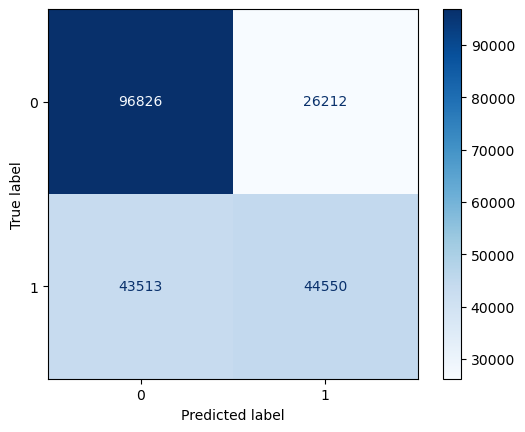

In [ ]:
model_dict = {'model': "catboots"}
new_row = pd.DataFrame([{**model_dict, **classificationMetrics(y_dev,y_pred,p_test)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
print(models_list)
cmat = confusion_matrix(y_dev, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=[0, 1])
cm_display.plot(cmap="Blues")
plt.show()

######  🔼 CatBoots -high AUC and Accuracy ,but recall very low -the goal is to identify as much as recisdivism

In [ ]:
#make label encoding for all category and objct features
cat_col = df[feature_list].select_dtypes(include='category').columns
for col in cat_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
#slit data to tarin ,valid ,test
X_train, X_temp, y_train, y_temp = train_test_split(df[feature_list], df['is_recid_new'], test_size=0.30, random_state=222)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=222)

y_train = y_train.astype('int')
y_dev = y_dev.astype('int')
y_test=y_test.astype('int')

In [ ]:
#SVCmodel_svc = LinearSVC(random_state=42)
model_svc.fit(X_train, y_train)
pred_SVC = model_svc.predict(X_test)

In [ ]:
model_dict = {'model': "SVC"}
new_row = pd.DataFrame([{**model_dict, **classificationMetrics(y_test,pred_SVC )}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,Accuracy,Precision,Recall,f1-score,Log-loss,AUC
0,SVC,0.64,0.60,0.39,0.47,13.13,0.60


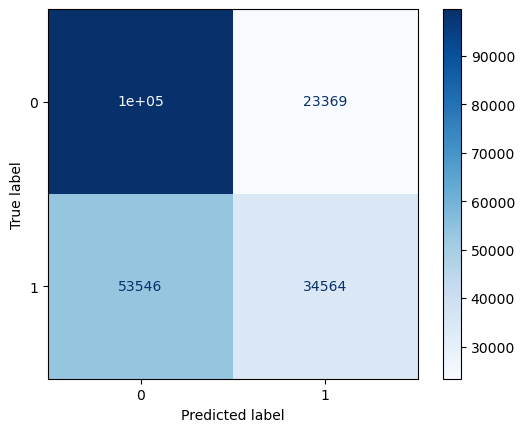

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cmat = confusion_matrix(y_test, pred_SVC)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=[0, 1])
cm_display.plot(cmap="Blues")
plt.show()


###### 🔼 LinearSVC brings bad results! all indicators are very low

In [ ]:
#RandomForest
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)
pred_rf=model_rf.predict(X_dev)

          model  Accuracy  Precision  Recall  f1-score  Log-loss  AUC
0      catboots      0.67       0.63    0.51      0.56      0.60 0.72
1  RandomForest      0.67       0.61    0.55      0.58      0.65 0.71


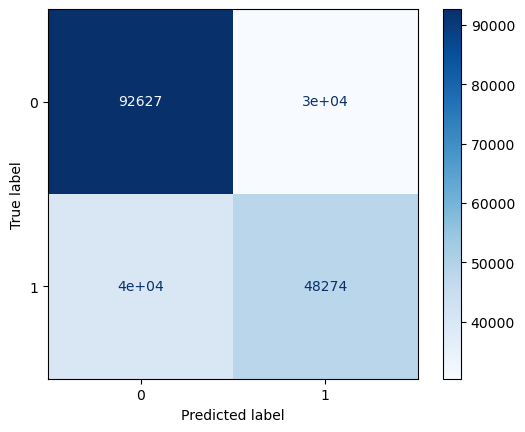

In [ ]:
y_pred_opt =model_rf.predict_proba(X_dev)[:, 1]
y_pred_rf = (y_pred_opt >= 0.5).astype(int)
model_dict = {'model': "RandomForest"}
new_row = pd.DataFrame([{**model_dict, **classificationMetrics(y_dev,y_pred_rf,y_pred_opt)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
print(models_list)
cmat = confusion_matrix(y_dev, y_pred_rf)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=[0, 1])
cm_display.plot(cmap="Blues")
plt.show()

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_dev)

           model  Accuracy  Precision  Recall  f1-score  Log-loss  AUC
0       catboots      0.67       0.63    0.51      0.56      0.60 0.72
1   RandomForest      0.67       0.61    0.55      0.58      0.65 0.71
2  XGBClassifier      0.67       0.63    0.51      0.56      0.61 0.72


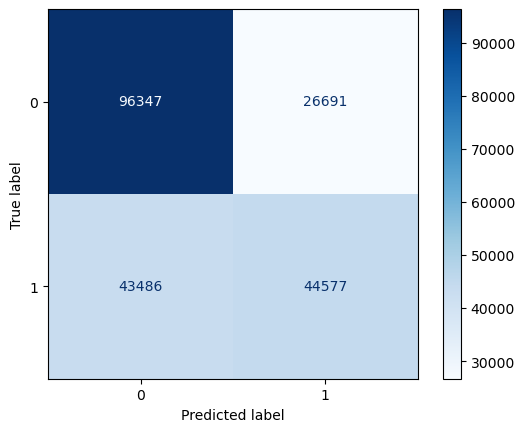

In [ ]:
y_pred_opt = model_xgb.predict_proba(X_dev)[:, 1]
model_dict = {'model': "XGBClassifier"}
new_row = pd.DataFrame([{**model_dict, **classificationMetrics(y_dev,pred_xgb,y_pred_opt)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
print(models_list)

cmat = confusion_matrix(y_dev,pred_xgb)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=[0, 1])
cm_display.plot(cmap="Blues")
plt.show()

In [ ]:
model_sgd = SGDClassifier(loss='log_loss')
model_sgd.fit(X_train, y_train)
pred_sgd = model_sgd.predict(X_dev)

           model  Accuracy  Precision  Recall  f1-score  Log-loss  AUC
0       catboots      0.67       0.63    0.51      0.56      0.60 0.72
1   RandomForest      0.67       0.61    0.55      0.58      0.65 0.71
2  XGBClassifier      0.67       0.63    0.51      0.56      0.61 0.72
3  SGDClassifier      0.59       0.65    0.04      0.08     14.63 0.56


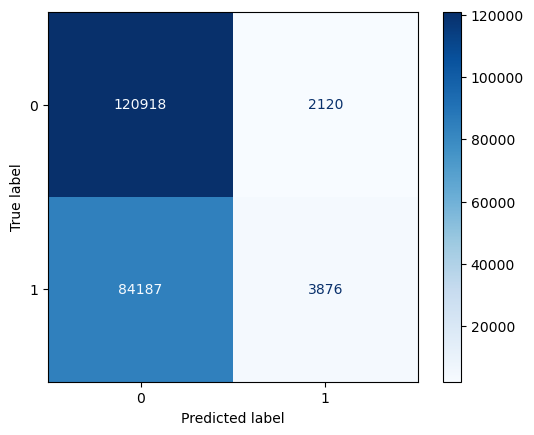

In [ ]:
model_dict = {'model': "SGDClassifier"}
y_pro=model_sgd.predict_proba(X_dev)[:, 1]
new_row = pd.DataFrame([{**model_dict, **classificationMetrics(y_dev,pred_sgd,y_pro)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
print(models_list)

cmat = confusion_matrix(y_dev, pred_sgd)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=[0, 1])
cm_display.plot(cmap="Blues")
plt.show()

### ✅ **Final Model Selection**

After running all models and evaluating their performance on **X_dev**,  
the model that achieved the best overall indicators was the **RandomForestClassifier**.

In [ ]:
#Finetuning for RandomForestClassifier
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
sample_idx_train= np.random.choice(len(X_train), size=int(0.1*len(X_train)), replace=False)
X_sample_train = X_train.iloc[sample_idx_train]
y_sample_train = y_train.iloc[sample_idx_train]

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num =5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 70, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


rf = RandomForestClassifier(random_state=222)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='f1',  n_iter = 30, cv = 3,
                               verbose=2, random_state=222, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_sample_train, y_sample_train)

{'n_estimators': [100, 325, 550, 775, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 25, 40, 55, 70], 'min_samples_split': [2, 3, 5, 10], 'min_samples_leaf': [2, 3, 4, 5], 'bootstrap': [True, False]}
Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=222),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 25, 40, 55, 70],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 5, 10],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   random_state=222, scoring='f1', verbose=2)

In [ ]:
#Best parameters :
rf_final = RandomForestClassifier(
    n_estimators=775,
    max_depth=70,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    criterion='gini',
    random_state=222,
    n_jobs=-1
)
rf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=775, n_jobs=-1, random_state=222)

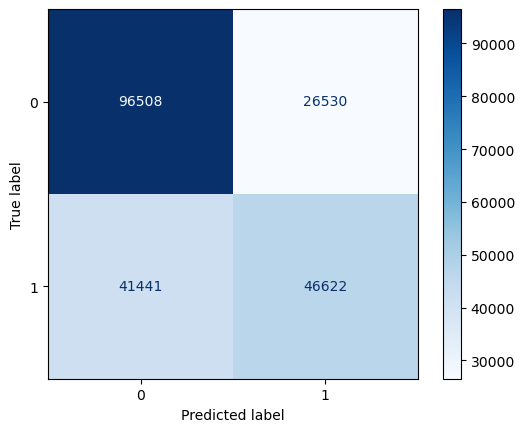

In [ ]:
#first modey_p=rf_final.predict(X_dev)
cmat = confusion_matrix(y_dev, y_p)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=[0, 1])
cm_display.plot(cmap="Blues")
plt.show()

###  **Threshold Optimization Explanation**

The model was initially **too conservative**, predicting the negative class too often.  
To improve its balance, I optimized the decision threshold based on the **F1-score**,  
since F1 provides a **harmonic balance between Precision and Recall**  
and reflects a fair trade-off between both classes (recidivists vs. non-recidivists).  
This helped achieve a more stable and balanced model performance.

In [ ]:
y_pred_opt = rf_final.predict_proba(X_dev)[:, 1] #take the probality
# Calculate F1-score — a good indicator of the balance between Precision and Recall.
# The goal is to achieve both indicators as high and as balanced as possible.
prec, rec, thr = precision_recall_curve(y_dev, y_pred_opt) #sort treshold
f1 = 2 * (prec * rec) / (prec + rec) #calculate F1
best_idx = np.argmax(f1[:-1]) #take the last one
best_f1 = f1[best_idx]
best_thr = thr[best_idx] #get the best treshold of F1
print(f"f1:{best_f1}")
print("The optimal threshold by F1 is:", best_thr)

f1:0.6352089815318646
The optimal threshold: 0.3650957107408721


In [ ]:
# Predict probabilities for the validation set
y_proba = rf_final.predict_proba(X_dev)[:, 1]

# Apply the chosen decision threshold (0.42)
# I tested multiple thresholds from 0.36 to 0.50,
# and 0.42 provided the best balance between Precision and Recall
y_pred = (y_proba >= 0.42).astype(int)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_dev, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_dev, y_pred))
print(classification_report(y_dev, y_pred, digits=3))
print(confusion_matrix(y_dev, y_pred))

Accuracy: 0.6575335976617828
Balanced Accuracy: 0.6615840427182123
              precision    recall  f1-score   support

           0      0.739     0.637     0.684    123038
           1      0.575     0.686     0.626     88063

    accuracy                          0.658    211101
   macro avg      0.657     0.662     0.655    211101
weighted avg      0.671     0.658     0.660    211101

[[78392 44646]
 [27649 60414]]


### 🔍 **Final Evaluation on X_test**

Predicting **X_test** using both the base model and the fine-tuned model  
to compare their performance and select the best one  
after determining the optimal threshold.

In [ ]:
#base model
pred_rf=model_rf.predict(X_test)

Metric,Score
Accuracy,0.643
Balanced Accuracy,0.650
AUC,0.650


,precision,recall,f1-score,support
0,0.732,0.611,0.666,122992.000
1,0.559,0.688,0.617,88110.000
accuracy,0.643,0.643,0.643,0.643
macro avg,0.646,0.650,0.641,211102.000
weighted avg,0.660,0.643,0.646,211102.000


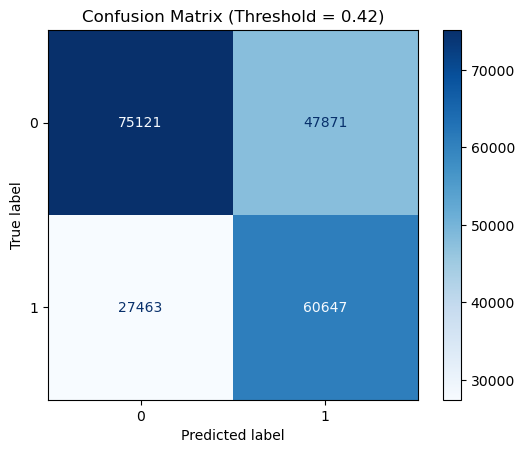

In [ ]:
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve)
proba = model_rf.predict_proba(X_test)[:, 1]
tresh=0.42
y_hat = (proba >=tresh ).astype(int)
acc = accuracy_score(y_test, y_hat)
bal_acc = balanced_accuracy_score(y_test, y_hat)
auc = roc_auc_score(y_test, y_hat)
report = classification_report(y_test, y_hat, digits=3, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_summary = pd.DataFrame({
    "Metric": ["Accuracy", "Balanced Accuracy", "AUC"],
    "Score": [acc, bal_acc, auc]
})

display(df_summary.style.format({"Score": "{:.3f}"}).hide(axis="index"))
display(df_report.style.background_gradient(cmap="Blues").format("{:.3f}"))
cmat = confusion_matrix(y_test, y_hat)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=[0, 1])
cm_display.plot(cmap="Blues")
plt.title("Confusion Matrix (Threshold = 0.42)")
plt.show()

Metric,Score
Accuracy,0.655
Balanced Accuracy,0.659
AUC,0.719


,precision,recall,f1-score,support
0,0.737,0.633,0.681,122992.000
1,0.572,0.686,0.624,88110.000
accuracy,0.655,0.655,0.655,0.655
macro avg,0.655,0.659,0.652,211102.000
weighted avg,0.668,0.655,0.657,211102.000


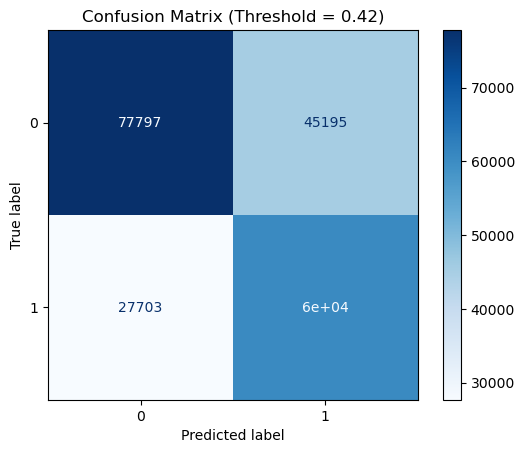

In [ ]:
#prdict X_test by randomForest with Finetuning
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve)
tresh = 0.42
y_pFN = rf_balanced_optimal.predict_proba(X_test)[:, 1]
y_FN_pred = (y_pFN >= tresh).astype(int)

acc = accuracy_score(y_test, y_FN_pred)
bal_acc = balanced_accuracy_score(y_test, y_FN_pred)
auc = roc_auc_score(y_test, y_pFN)  # <-- חישוב ה-AUC לפי ההסתברויות
report = classification_report(y_test, y_FN_pred, digits=3, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_summary = pd.DataFrame({
    "Metric": ["Accuracy", "Balanced Accuracy", "AUC"],
    "Score": [acc, bal_acc, auc]
})

display(df_summary.style.format({"Score": "{:.3f}"}).hide(axis="index"))
display(df_report.style.background_gradient(cmap="Blues").format("{:.3f}"))

# Confusion Matrix
cmat = confusion_matrix(y_test, y_FN_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=[0, 1])
cm_display.plot(cmap="Blues")
plt.title(f"Confusion Matrix (Threshold = {tresh})")
plt.show()


#### 📈 **Model Performance Comparison**

The indicators show that the **fine-tuned model** provides significantly better predictions  
compared to the base model, demonstrating improved balance across all key metrics.  

Now moving to **production phase...** 🚀  

**Finally!!! 🎯**